# K MEANS

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
df = pd.read_csv('/content/abstracts.csv')



In [ ]:
df

,id,abstract
0,1,he field of machine learning has proven to be ...
1,2,Volunteer cotton (VC) plants growing in the fi...
2,3,Biomedical image analysis methods are graduall...
3,4,"Background In recent years, machine learning (..."
4,5,Due to the digitalization of life and the fier...
5,6,Transformer architectures are highly expressiv...
6,7,To stop climate change caused by the anthropog...
7,8,This paper reviews the current state of ChatGP...
8,9,With advancements in sequencing and proteomics...
9,10,Protein structure and function prediction are ...


In [ ]:
# Clean the abstracts by removing punctuation and converting to lowercase
df['abstract'] = df['abstract'].str.replace('[^\w\s]','').str.lower()

<ipython-input-58-320da8a2ed7e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['abstract'] = df['abstract'].str.replace('[^\w\s]','').str.lower()


In [ ]:
# Vectorize the abstracts using the TF-IDF algorithm
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['abstract'])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


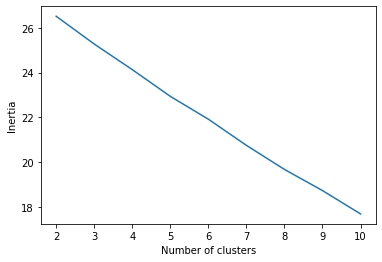

In [ ]:
# Use the elbow method to determine the optimal number of clusters
inertias = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(2, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Choose the k-means algorithm with 5 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Step 4: Perform clustering
# Apply the k-means algorithm to the vectorized abstracts
kmeans.fit(X)


KMeans(n_clusters=6, random_state=42)

In [ ]:
labels = kmeans.labels_
score = silhouette_score(X, labels)
print(f'Silhouette score: {score}')

NameError: ignored

In [ ]:
df['cluster'] = labels
for i in range(4):
    cluster_df = df[df['cluster'] == i]
    print(f'Cluster {i+1}: {len(cluster_df)} abstracts')
    print(cluster_df['abstract'].head(5))
    print('\n')

NameError: ignored

In [ ]:
df

,id,abstract,cluster
0,1,he field of machine learning has proven to be ...,4
1,2,volunteer cotton vc plants growing in the fiel...,4
2,3,biomedical image analysis methods are graduall...,4
3,4,background in recent years machine learning ml...,4
4,5,due to the digitalization of life and the fier...,4
5,6,transformer architectures are highly expressiv...,4
6,7,to stop climate change caused by the anthropog...,0
7,8,this paper reviews the current state of chatgp...,2
8,9,with advancements in sequencing and proteomics...,2
9,10,protein structure and function prediction are ...,2


In [ ]:
# import pandas as pd
# import numpy as np
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans

# # Step 1: Load the data
# data = pd.read_csv('research_papers.csv')

# # Step 2: Preprocess the abstracts
# # Tokenize the text
# data['tokens'] = data['abstract'].apply(word_tokenize)

# # Remove stopwords
# stop_words = set(stopwords.words('english'))
# data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# # Lemmatize the tokens
# lemmatizer = WordNetLemmatizer()
# data['tokens'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# # Step 3: Summarize the abstracts
# # Use the first 50 words of each abstract as a summary
# data['summary'] = data['tokens'].apply(lambda x: ' '.join(x[:50]))

# # Step 4: Vectorize the summaries
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(data['summary'])

# # Step 5: Apply k-means clustering
# kmeans = KMeans(n_clusters=4, random_state=42)
# kmeans.fit(X)

# # Step 6: Print the clusters
# labels = kmeans.labels_
# data['cluster'] = labels
# for i in range(4):
#     cluster_df = data[data['cluster'] == i]
#     print(f'Cluster {i+1}: {len(cluster_df)} abstracts')
#     print(cluster_df['abstract'].head(5))
#     print('\n')

In [ ]:
# import pandas as pd
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Step 1: Load the data
# data = pd.read_csv('research_papers.csv')

# # Step 2: Tokenize the abstracts
# data['tokens'] = data['abstract'].apply(word_tokenize)

# # Step 3: Lowercase the tokens
# data['tokens'] = data['tokens'].apply(lambda x: [word.lower() for word in x])

# # Step 4: Remove stopwords
# stop_words = set(stopwords.words('english'))
# data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# # Step 5: Lemmatize the tokens
# lemmatizer = WordNetLemmatizer()
# data['tokens'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# # Step 6: Vectorize the tokens
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(data['tokens'])

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
# Step 1: Load the data
data = pd.read_csv('abstracts.csv')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Step 2: Tokenize the abstracts
data['tokens'] = data['abstract'].apply(word_tokenize)

data

In [ ]:
# Step 3: Lowercase the tokens
data['tokens'] = data['tokens'].apply(lambda x: [word.lower() for word in x])

data

In [ ]:
# Step 4: Remove stopwords
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

data

In [ ]:
# Step 5: Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
data['tokens'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

data

In [ ]:
# Step 6: Convert tokens to string
data['processed'] = data['tokens'].apply(lambda x: ' '.join(x))

data

In [ ]:
# Step 7: Vectorize the processed text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed'])

data

In [ ]:
# Step 8: Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

In [ ]:
# Step 9: Extract the most relevant words for each cluster
terms = vectorizer.get_feature_names_out()
cluster_names = []
for i in range(4):
    center = kmeans.cluster_centers_[i]
    top_indexes = center.argsort()[::-1][:3] # change 2 to the number of relevant words you want to extract
    top_terms = [terms[index] for index in top_indexes]
    cluster_name = ' '.join(top_terms)
    cluster_names.append(cluster_name)


In [ ]:
data

In [ ]:
# Step 10: Add cluster names to data
data['cluster_name'] = [cluster_names[label] for label in kmeans.labels_]

In [ ]:
# Step 11: Print the clusters with names
for i in range(4):
    cluster_df = data[data['cluster_name'] == i]
    print(f'Cluster {i+1} ({cluster_names[i]}): {len(cluster_df)} abstracts')
    print(cluster_df['processed'].head(5))
    print('\n')

In [ ]:
data

In [ ]:
data.to_csv('abstracts_classified.csv')

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette score for the clustering: {silhouette_avg}")

Silhouette score for the clustering: 0.021651743052525704


In [ ]:
import joblib

In [ ]:
joblib.dump(kmeans, 'kmeans_model.pkl')

In [ ]:
data

In [ ]:
joblib.dump(vectorizer, 'vectorizer.pkl')

In [ ]:
import pickle

In [ ]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import csv
import os

with open('Titles.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        filename = row[1]
        with open(filename, 'r') as file:
            text = file.read()
            print(text)


Food is the main energy source for the living beings; as such food quality and safety
have been in the highest demand throughout the human history. Internet of things (IOT) is a 
technology with a vision to connect anything at anytime and anywhere. Utilizing IOT in the 
food supply chain (FSC) is believed to enhance the quality of life by tracing and tracking the 
food conditions and live-sharing the obtained data with the consumers or the FSC supervisors. 
Currently, full application of IOT in the FSC is still in the developing stage and there is a big 
gap for improvements. The purpose of this paper is to explore the possibility of applying IOT 
for agriculture to trace and track food quality and safety. Mobile application for food freshness 
investigation was successfully developed and the results showed that consumer mobile camera 
could be used to test the freshness of food. By applying the IOT technology this information 
could be shared with all the consumers and also the superv

In [ ]:
import csv
import os
import pandas as pd
import numpy as np

with open('New_Titles.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

with open('Titles.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        title = row[0]
        filename = row[1]
        with open(filename, 'r') as file:
            text = file.read()
            with open('New_Titles.csv', 'a', newline='') as csvfile:
                writer = csv.writer(csvfile)
                writer.writerow([title, text])


In [ ]:
df = pd.read_csv('New_Titles.csv')

In [ ]:
df

,IOT for Agriculture: Food Quality and Safety,"Food is the main energy source for the living beings; as such food quality and safety\nhave been in the highest demand throughout the human history. Internet of things (IOT) is a \ntechnology with a vision to connect anything at anytime and anywhere. Utilizing IOT in the \nfood supply chain (FSC) is believed to enhance the quality of life by tracing and tracking the \nfood conditions and live-sharing the obtained data with the consumers or the FSC supervisors. \nCurrently, full application of IOT in the FSC is still in the developing stage and there is a big \ngap for improvements. The purpose of this paper is to explore the possibility of applying IOT \nfor agriculture to trace and track food quality and safety. Mobile application for food freshness \ninvestigation was successfully developed and the results showed that consumer mobile camera \ncould be used to test the freshness of food. By applying the IOT technology this information \ncould be shared with all the consumers and also the supervisors."
0,Smart Farming – IoT in Agriculture,IoT is a revolutionary technology that represe...
1,IoT and agriculture data analysis for smart farm,"In this paper, we propose developing a system ..."
2,IoT-based Agriculture: Deep Learning in Detect...,IoT-based agricultural environment provides th...
3,Internet of Things in agriculture,This literature review on Internet of Things (...
4,A Survey of Text Summarization Techniques,Numerous approaches for identifying important ...
5,A SURVEY AUTOMATIC TEXT SUMMARIZATION,Text summarization is compress the source text...
6,Automatic text summarization: A comprehensive ...,Automatic Text Summarization (ATS) is becoming...
7,Recent automatic text summarization techniques...,As information is available in abundance for e...
8,,It has been more than 50 years since the initi...
9,Sentiment analysis and its applications in fig...,The COVID-19 pandemic caused by the novel coro...


In [ ]:
with open('New_Titles.csv', 'r+', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
  
    csv_writer.writerow(['Title', 'Abstract'])

csvfile.close()

In [ ]:
import csv
import os
import pandas as pd
import numpy as np

df = pd.read_csv('dataset_final.csv')

df

,Title,Abstract
0,Natural Language Processing,The abundant volume of natural language text i...
1,"Pre-train, Prompt, and Predict: A Systematic S...",This article surveys and organizes research wo...
2,Graph Neural Networks for Natural Language Pro...,Deep learning has become the dominant approach...
3,I just want to matter: Examining the role of a...,"Annually, tens of thousands of lives are affec..."
4,Data augmentation in natural language processi...,"In many cases of machine learning, research su..."
...,...,...
148,The impact of summarisation on textual entailm...,The challenging task of recognizing textual en...
149,Diffusion of Abstractive Summarisation to Impr...,Even though the abstractive summarisation meth...
150,Summarising company announcements,This paper describes work that attempts to use...
151,Fuzzy logic-based single document summarisatio...,Text summarisation is compressed or condensed ...


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Step 2: Tokenize the abstracts
df['tokens'] = df['Abstract'].apply(word_tokenize)

df

,Title,Abstract,tokens
0,Natural Language Processing,The abundant volume of natural language text i...,"[The, abundant, volume, of, natural, language,..."
1,"Pre-train, Prompt, and Predict: A Systematic S...",This article surveys and organizes research wo...,"[This, article, surveys, and, organizes, resea..."
2,Graph Neural Networks for Natural Language Pro...,Deep learning has become the dominant approach...,"[Deep, learning, has, become, the, dominant, a..."
3,I just want to matter: Examining the role of a...,"Annually, tens of thousands of lives are affec...","[Annually, ,, tens, of, thousands, of, lives, ..."
4,Data augmentation in natural language processi...,"In many cases of machine learning, research su...","[In, many, cases, of, machine, learning, ,, re..."
...,...,...,...
148,The impact of summarisation on textual entailm...,The challenging task of recognizing textual en...,"[The, challenging, task, of, recognizing, text..."
149,Diffusion of Abstractive Summarisation to Impr...,Even though the abstractive summarisation meth...,"[Even, though, the, abstractive, summarisation..."
150,Summarising company announcements,This paper describes work that attempts to use...,"[This, paper, describes, work, that, attempts,..."
151,Fuzzy logic-based single document summarisatio...,Text summarisation is compressed or condensed ...,"[Text, summarisation, is, compressed, or, cond..."


In [ ]:
# Step 3: Lowercase the tokens
df['tokens'] = df['tokens'].apply(lambda x: [word.lower() for word in x])

df

,Title,Abstract,tokens
0,Natural Language Processing,The abundant volume of natural language text i...,"[the, abundant, volume, of, natural, language,..."
1,"Pre-train, Prompt, and Predict: A Systematic S...",This article surveys and organizes research wo...,"[this, article, surveys, and, organizes, resea..."
2,Graph Neural Networks for Natural Language Pro...,Deep learning has become the dominant approach...,"[deep, learning, has, become, the, dominant, a..."
3,I just want to matter: Examining the role of a...,"Annually, tens of thousands of lives are affec...","[annually, ,, tens, of, thousands, of, lives, ..."
4,Data augmentation in natural language processi...,"In many cases of machine learning, research su...","[in, many, cases, of, machine, learning, ,, re..."
...,...,...,...
148,The impact of summarisation on textual entailm...,The challenging task of recognizing textual en...,"[the, challenging, task, of, recognizing, text..."
149,Diffusion of Abstractive Summarisation to Impr...,Even though the abstractive summarisation meth...,"[even, though, the, abstractive, summarisation..."
150,Summarising company announcements,This paper describes work that attempts to use...,"[this, paper, describes, work, that, attempts,..."
151,Fuzzy logic-based single document summarisatio...,Text summarisation is compressed or condensed ...,"[text, summarisation, is, compressed, or, cond..."


In [ ]:
# Step 4: Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

df

,Title,Abstract,tokens
0,Natural Language Processing,The abundant volume of natural language text i...,"[abundant, volume, natural, language, text, co..."
1,"Pre-train, Prompt, and Predict: A Systematic S...",This article surveys and organizes research wo...,"[article, surveys, organizes, research, works,..."
2,Graph Neural Networks for Natural Language Pro...,Deep learning has become the dominant approach...,"[deep, learning, become, dominant, approach, a..."
3,I just want to matter: Examining the role of a...,"Annually, tens of thousands of lives are affec...","[annually, ,, tens, thousands, lives, affected..."
4,Data augmentation in natural language processi...,"In many cases of machine learning, research su...","[many, cases, machine, learning, ,, research, ..."
...,...,...,...
148,The impact of summarisation on textual entailm...,The challenging task of recognizing textual en...,"[challenging, task, recognizing, textual, enta..."
149,Diffusion of Abstractive Summarisation to Impr...,Even though the abstractive summarisation meth...,"[even, though, abstractive, summarisation, met..."
150,Summarising company announcements,This paper describes work that attempts to use...,"[paper, describes, work, attempts, use, langua..."
151,Fuzzy logic-based single document summarisatio...,Text summarisation is compressed or condensed ...,"[text, summarisation, compressed, condensed, v..."


In [ ]:
# Step 5: Lemmatize the tokens
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df

,Title,Abstract,tokens
0,Natural Language Processing,The abundant volume of natural language text i...,"[abundant, volume, natural, language, text, co..."
1,"Pre-train, Prompt, and Predict: A Systematic S...",This article surveys and organizes research wo...,"[article, survey, organizes, research, work, n..."
2,Graph Neural Networks for Natural Language Pro...,Deep learning has become the dominant approach...,"[deep, learning, become, dominant, approach, a..."
3,I just want to matter: Examining the role of a...,"Annually, tens of thousands of lives are affec...","[annually, ,, ten, thousand, life, affected, s..."
4,Data augmentation in natural language processi...,"In many cases of machine learning, research su...","[many, case, machine, learning, ,, research, s..."
...,...,...,...
148,The impact of summarisation on textual entailm...,The challenging task of recognizing textual en...,"[challenging, task, recognizing, textual, enta..."
149,Diffusion of Abstractive Summarisation to Impr...,Even though the abstractive summarisation meth...,"[even, though, abstractive, summarisation, met..."
150,Summarising company announcements,This paper describes work that attempts to use...,"[paper, describes, work, attempt, use, languag..."
151,Fuzzy logic-based single document summarisatio...,Text summarisation is compressed or condensed ...,"[text, summarisation, compressed, condensed, v..."


In [ ]:
# Step 6: Convert tokens to string
df['processed'] = df['tokens'].apply(lambda x: ' '.join(x))

df

,Title,Abstract,tokens,processed
0,Natural Language Processing,The abundant volume of natural language text i...,"[abundant, volume, natural, language, text, co...",abundant volume natural language text connecte...
1,"Pre-train, Prompt, and Predict: A Systematic S...",This article surveys and organizes research wo...,"[article, survey, organizes, research, work, n...",article survey organizes research work new par...
2,Graph Neural Networks for Natural Language Pro...,Deep learning has become the dominant approach...,"[deep, learning, become, dominant, approach, a...",deep learning become dominant approach address...
3,I just want to matter: Examining the role of a...,"Annually, tens of thousands of lives are affec...","[annually, ,, ten, thousand, life, affected, s...","annually , ten thousand life affected suicide ..."
4,Data augmentation in natural language processi...,"In many cases of machine learning, research su...","[many, case, machine, learning, ,, research, s...","many case machine learning , research suggests..."
...,...,...,...,...
148,The impact of summarisation on textual entailm...,The challenging task of recognizing textual en...,"[challenging, task, recognizing, textual, enta...",challenging task recognizing textual entailmen...
149,Diffusion of Abstractive Summarisation to Impr...,Even though the abstractive summarisation meth...,"[even, though, abstractive, summarisation, met...",even though abstractive summarisation method e...
150,Summarising company announcements,This paper describes work that attempts to use...,"[paper, describes, work, attempt, use, languag...",paper describes work attempt use language tech...
151,Fuzzy logic-based single document summarisatio...,Text summarisation is compressed or condensed ...,"[text, summarisation, compressed, condensed, v...",text summarisation compressed condensed versio...


In [ ]:
# Step 7: Vectorize the processed text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed'])

df

,Title,Abstract,tokens,processed
0,Natural Language Processing,The abundant volume of natural language text i...,"[abundant, volume, natural, language, text, co...",abundant volume natural language text connecte...
1,"Pre-train, Prompt, and Predict: A Systematic S...",This article surveys and organizes research wo...,"[article, survey, organizes, research, work, n...",article survey organizes research work new par...
2,Graph Neural Networks for Natural Language Pro...,Deep learning has become the dominant approach...,"[deep, learning, become, dominant, approach, a...",deep learning become dominant approach address...
3,I just want to matter: Examining the role of a...,"Annually, tens of thousands of lives are affec...","[annually, ,, ten, thousand, life, affected, s...","annually , ten thousand life affected suicide ..."
4,Data augmentation in natural language processi...,"In many cases of machine learning, research su...","[many, case, machine, learning, ,, research, s...","many case machine learning , research suggests..."
...,...,...,...,...
148,The impact of summarisation on textual entailm...,The challenging task of recognizing textual en...,"[challenging, task, recognizing, textual, enta...",challenging task recognizing textual entailmen...
149,Diffusion of Abstractive Summarisation to Impr...,Even though the abstractive summarisation meth...,"[even, though, abstractive, summarisation, met...",even though abstractive summarisation method e...
150,Summarising company announcements,This paper describes work that attempts to use...,"[paper, describes, work, attempt, use, languag...",paper describes work attempt use language tech...
151,Fuzzy logic-based single document summarisatio...,Text summarisation is compressed or condensed ...,"[text, summarisation, compressed, condensed, v...",text summarisation compressed condensed versio...


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


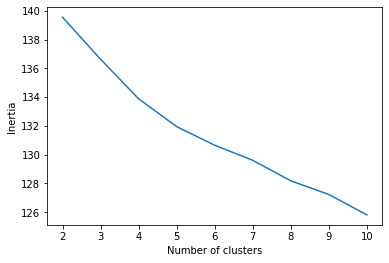

In [ ]:
inertias = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(2, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Step 8: Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Step 9: Extract the most relevant words for each cluster
terms = vectorizer.get_feature_names_out()
cluster_names = []
for i in range(4):
    center = kmeans.cluster_centers_[i]
    top_indexes = center.argsort()[::-1][:3] # change 2 to the number of relevant words you want to extract
    top_terms = [terms[index] for index in top_indexes]
    cluster_name = ' '.join(top_terms)
    cluster_names.append(cluster_name)

df

,Title,Abstract,tokens,processed
0,Natural Language Processing,The abundant volume of natural language text i...,"[abundant, volume, natural, language, text, co...",abundant volume natural language text connecte...
1,"Pre-train, Prompt, and Predict: A Systematic S...",This article surveys and organizes research wo...,"[article, survey, organizes, research, work, n...",article survey organizes research work new par...
2,Graph Neural Networks for Natural Language Pro...,Deep learning has become the dominant approach...,"[deep, learning, become, dominant, approach, a...",deep learning become dominant approach address...
3,I just want to matter: Examining the role of a...,"Annually, tens of thousands of lives are affec...","[annually, ,, ten, thousand, life, affected, s...","annually , ten thousand life affected suicide ..."
4,Data augmentation in natural language processi...,"In many cases of machine learning, research su...","[many, case, machine, learning, ,, research, s...","many case machine learning , research suggests..."
...,...,...,...,...
148,The impact of summarisation on textual entailm...,The challenging task of recognizing textual en...,"[challenging, task, recognizing, textual, enta...",challenging task recognizing textual entailmen...
149,Diffusion of Abstractive Summarisation to Impr...,Even though the abstractive summarisation meth...,"[even, though, abstractive, summarisation, met...",even though abstractive summarisation method e...
150,Summarising company announcements,This paper describes work that attempts to use...,"[paper, describes, work, attempt, use, languag...",paper describes work attempt use language tech...
151,Fuzzy logic-based single document summarisatio...,Text summarisation is compressed or condensed ...,"[text, summarisation, compressed, condensed, v...",text summarisation compressed condensed versio...


In [ ]:
df

,Title,Abstract,tokens,processed
0,Natural Language Processing,The abundant volume of natural language text i...,"[abundant, volume, natural, language, text, co...",abundant volume natural language text connecte...
1,"Pre-train, Prompt, and Predict: A Systematic S...",This article surveys and organizes research wo...,"[article, survey, organizes, research, work, n...",article survey organizes research work new par...
2,Graph Neural Networks for Natural Language Pro...,Deep learning has become the dominant approach...,"[deep, learning, become, dominant, approach, a...",deep learning become dominant approach address...
3,I just want to matter: Examining the role of a...,"Annually, tens of thousands of lives are affec...","[annually, ,, ten, thousand, life, affected, s...","annually , ten thousand life affected suicide ..."
4,Data augmentation in natural language processi...,"In many cases of machine learning, research su...","[many, case, machine, learning, ,, research, s...","many case machine learning , research suggests..."
...,...,...,...,...
148,The impact of summarisation on textual entailm...,The challenging task of recognizing textual en...,"[challenging, task, recognizing, textual, enta...",challenging task recognizing textual entailmen...
149,Diffusion of Abstractive Summarisation to Impr...,Even though the abstractive summarisation meth...,"[even, though, abstractive, summarisation, met...",even though abstractive summarisation method e...
150,Summarising company announcements,This paper describes work that attempts to use...,"[paper, describes, work, attempt, use, languag...",paper describes work attempt use language tech...
151,Fuzzy logic-based single document summarisatio...,Text summarisation is compressed or condensed ...,"[text, summarisation, compressed, condensed, v...",text summarisation compressed condensed versio...


In [ ]:
df['kmeans.labels_'] = kmeans.labels_

In [ ]:
# Step 10: Add cluster names to data
df['cluster_name'] = [cluster_names[label] for label in kmeans.labels_] 


In [ ]:
df['cluster_label_and_name'] = df['kmeans.labels_'].astype(str) + '_' + df['cluster_name']

In [ ]:
df

,Title,Abstract,tokens,processed,kmeans.labels_,cluster_name,cluster_label_and_name
0,Natural Language Processing,The abundant volume of natural language text i...,"[abundant, volume, natural, language, text, co...",abundant volume natural language text connecte...,2,vision nlp model,2_vision nlp model
1,"Pre-train, Prompt, and Predict: A Systematic S...",This article surveys and organizes research wo...,"[article, survey, organizes, research, work, n...",article survey organizes research work new par...,2,vision nlp model,2_vision nlp model
2,Graph Neural Networks for Natural Language Pro...,Deep learning has become the dominant approach...,"[deep, learning, become, dominant, approach, a...",deep learning become dominant approach address...,2,vision nlp model,2_vision nlp model
3,I just want to matter: Examining the role of a...,"Annually, tens of thousands of lives are affec...","[annually, ,, ten, thousand, life, affected, s...","annually , ten thousand life affected suicide ...",2,vision nlp model,2_vision nlp model
4,Data augmentation in natural language processi...,"In many cases of machine learning, research su...","[many, case, machine, learning, ,, research, s...","many case machine learning , research suggests...",0,summarisation text document,0_summarisation text document
...,...,...,...,...,...,...,...
148,The impact of summarisation on textual entailm...,The challenging task of recognizing textual en...,"[challenging, task, recognizing, textual, enta...",challenging task recognizing textual entailmen...,0,summarisation text document,0_summarisation text document
149,Diffusion of Abstractive Summarisation to Impr...,Even though the abstractive summarisation meth...,"[even, though, abstractive, summarisation, met...",even though abstractive summarisation method e...,0,summarisation text document,0_summarisation text document
150,Summarising company announcements,This paper describes work that attempts to use...,"[paper, describes, work, attempt, use, languag...",paper describes work attempt use language tech...,0,summarisation text document,0_summarisation text document
151,Fuzzy logic-based single document summarisatio...,Text summarisation is compressed or condensed ...,"[text, summarisation, compressed, condensed, v...",text summarisation compressed condensed versio...,0,summarisation text document,0_summarisation text document


In [ ]:
df.to_csv('data_101.csv', index=False)

In [ ]:
df

,Title,Abstract,tokens,processed,kmeans.labels_,cluster_name,cluster_label_and_name
0,Natural Language Processing,The abundant volume of natural language text i...,"[abundant, volume, natural, language, text, co...",abundant volume natural language text connecte...,2,vision nlp model,2_vision nlp model
1,"Pre-train, Prompt, and Predict: A Systematic S...",This article surveys and organizes research wo...,"[article, survey, organizes, research, work, n...",article survey organizes research work new par...,2,vision nlp model,2_vision nlp model
2,Graph Neural Networks for Natural Language Pro...,Deep learning has become the dominant approach...,"[deep, learning, become, dominant, approach, a...",deep learning become dominant approach address...,2,vision nlp model,2_vision nlp model
3,I just want to matter: Examining the role of a...,"Annually, tens of thousands of lives are affec...","[annually, ,, ten, thousand, life, affected, s...","annually , ten thousand life affected suicide ...",2,vision nlp model,2_vision nlp model
4,Data augmentation in natural language processi...,"In many cases of machine learning, research su...","[many, case, machine, learning, ,, research, s...","many case machine learning , research suggests...",0,summarisation text document,0_summarisation text document
...,...,...,...,...,...,...,...
148,The impact of summarisation on textual entailm...,The challenging task of recognizing textual en...,"[challenging, task, recognizing, textual, enta...",challenging task recognizing textual entailmen...,0,summarisation text document,0_summarisation text document
149,Diffusion of Abstractive Summarisation to Impr...,Even though the abstractive summarisation meth...,"[even, though, abstractive, summarisation, met...",even though abstractive summarisation method e...,0,summarisation text document,0_summarisation text document
150,Summarising company announcements,This paper describes work that attempts to use...,"[paper, describes, work, attempt, use, languag...",paper describes work attempt use language tech...,0,summarisation text document,0_summarisation text document
151,Fuzzy logic-based single document summarisatio...,Text summarisation is compressed or condensed ...,"[text, summarisation, compressed, condensed, v...",text summarisation compressed condensed versio...,0,summarisation text document,0_summarisation text document


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette score for the clustering: {silhouette_avg}")

Silhouette score for the clustering: 0.0334548805203506


In [ ]:
import joblib

joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

# Hierarchical Clustering

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster 0:
0    The abundant volume of natural language text i...
1    This article surveys and organizes research wo...
2    Deep learning has become the dominant approach...
3    Annually, tens of thousands of lives are affec...
4    In many cases of machine learning, research su...
5    Data Augmentation (DA) methods – a family of t...
6    Medical coding is the process that converts cl...
7    This paper presents Echo State Network (ESN) b...
8    Methodologies for failure assessment frequentl...
9    To reach large groups of vaccine recipients, s...
Name: Abstract, dtype: object

Cluster 1:
41     Since its inception, Healthcare 4.0 has empowe...
92     Cloud computing is a new field in Internet com...
93     Service-oriented computing and cloud computing...
94     We live and operate in the world of computing ...
95     Cloud computing emerges as a new computing par...
96     Cloud computing has been a dominant IT news to...
97     With the advent internet in the 1990s to the p..

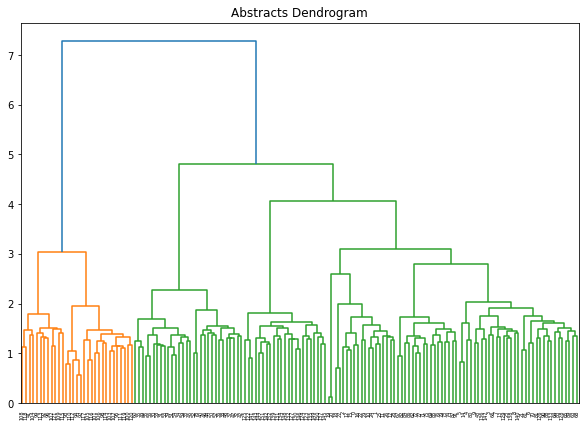

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Load the abstracts dataset
df = pd.read_csv('dataset_final.csv')

# Preprocess the text data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf = tfidf_vectorizer.fit_transform(df['Abstract'])

# Calculate document similarity
similarity_matrix = cosine_similarity(tfidf)

# Perform hierarchical clustering
plt.figure(figsize=(10, 7))
plt.title("Abstracts Dendrogram")
dend = shc.dendrogram(shc.linkage(similarity_matrix, method='ward'))

# Choose the number of clusters
n_clusters = 4
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster.fit_predict(similarity_matrix)

# Assign documents to clusters
df['cluster'] = cluster.labels_

# Print the top 10 documents in each cluster
for i in range(n_clusters):
    cluster_df = df[df['cluster'] == i]
    print(f'Cluster {i}:')
    print(cluster_df['Abstract'][:10])
    print()


In [ ]:
labels = cluster.fit_predict(similarity_matrix)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
score = silhouette_score(X, labels)
print("Silhouette score:", score)

Silhouette score: 0.03310333190640383
